# Slow Convergence of Gradient descent

This is an example, that even with _the best_ stepsize gradient descent can be slow

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7,7]

We look at the function $F(\mathbf x) = x_1^2 + \varepsilon x_2^2 = \mathbf x^{\mathrm{T}} S \mathbf x$, where $S = \begin{pmatrix}1 & 0 \\ 0 & \varepsilon\end{pmatrix}$ and $\varepsilon > 0$. So $S$ is symmetric, and positive definite. Another way of looking at this is to write it as $\lVert A\mathbf x - \mathbf b\lVert_2^2$ with $\mathbf b$ the zero vector and $S=A^\mathrm{T}A$, i.e. $A = \operatorname{diag}(1,\sqrt{\varepsilon})$.

We obtain $\nabla F(\mathbf x) = \begin{pmatrix}2x_1\\2\varepsilon x_2\end{pmatrix}$

And start in $\mathbf x^{(0)} = (\varepsilon, 1)^\mathrm{T}$.

Note that $\nabla F(\mathbf x^{(0)}) = \begin{pmatrix}2\varepsilon\\2\varepsilon\end{pmatrix}$ and for any scaled start point we have $\nabla F(s\mathbf x^{(0)}) = \begin{pmatrix}2s\varepsilon\\2s\varepsilon\end{pmatrix} = s\nabla F(\mathbf x^{(0)})$

Let's first get an impression of the function by looking at the contour lines.

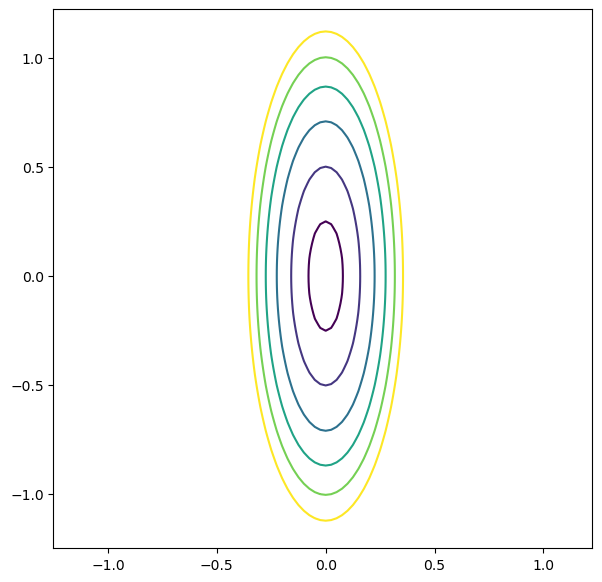

In [3]:
ε = 0.1

def f(X,Y):
    return X**2 + ε*Y**2

def gradf(x):
    return np.array([2*x[0], 2*ε*x[1]])
    
delta = 0.025
x = np.arange(-1.25, 1.25, delta)
y = np.arange(-1.25, 1.25, delta)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

l = [1/ε**(0.8) * a for a in [0.001, 0.004, 0.008, 0.012, 0.016, 0.02]]

fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels= l);
ax.set_aspect("equal")

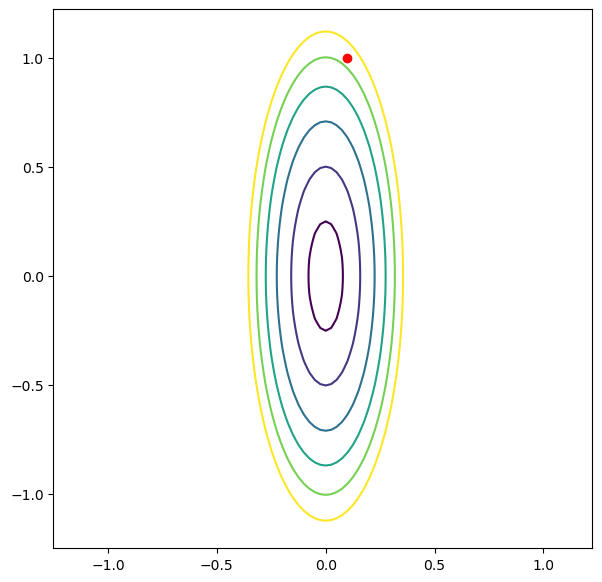

In [4]:
x0 = np.array([ε, 1])
ax.plot(x0[0], x0[1], 'ro')
fig

Then,
looking for the first optimal step size when using gradient descent, i.e. with $\mathbf d^{(k)} = -\nabla F(\mathbf x^{(k)})$, we get

$$
\phi(\alpha) = F(\mathbf x^{(0)} - \alpha \nabla F(\mathbf x^{(0)}))
 = F\Bigl( \begin{pmatrix}\varepsilon - 2\alpha\epsilon\\1 - 2\alpha\varepsilon\end{pmatrix} \Bigr)
 = (\varepsilon - 2\alpha\epsilon)^2 + \varepsilon(1 - 2\alpha\varepsilon)^2
$$

Hence

$$
\phi'(\alpha) = -2\cdot2\varepsilon\cdot(\varepsilon - 2\alpha\epsilon) - 2\varepsilon\cdot2\varepsilon(1 - 2\alpha\varepsilon) = -8\varepsilon^2 + 8\varepsilon^2\alpha(1+\varepsilon)
$$

For the optimal value, we set $\phi'$ to zero, divide by $8\varepsilon^2$ and obtain $\alpha = \frac{1}{1+\varepsilon}$. Note that 

$$\mathbf x^{(1)} = \mathbf x^{(0)} + \alpha\nabla F(\mathbf x^{(0)}) = \frac{\varepsilon-1}{\varepsilon+1}\begin{pmatrix}\varepsilon\\ 1 \end{pmatrix} = \frac{\varepsilon-1}{\varepsilon+1}\mathbf x^{(0)}
$$

Since the iterate $\mathbf x^{(1)}$ only changes by a factor, so does (see above) the gradient $\nabla F(\mathbf x^{(1)})$. Since $F$ is quadratic in $\mathbf x$, by the chain rule $\phi'$ is linear (in $\alpha$) and hence this factor (in front of $\mathbf x^{(1)})$ vanishes when setting $\phi'$ to zero

So $\alpha = \frac{1}{1+\varepsilon}$ is **always** the best step size.


In [5]:
τ = 1/(1+ε)

iterates = [x0]
maxiter = 25

xk = x0

for i in range(maxiter):
    xk = xk - τ*gradf(xk)
    iterates.append(xk)

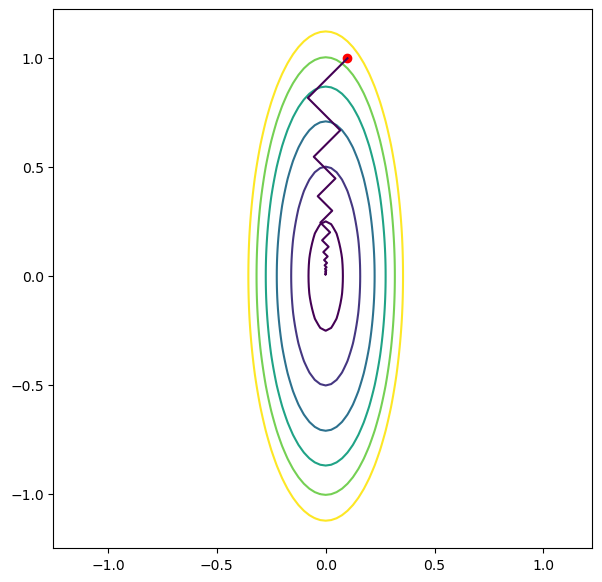

In [6]:
x0Iter = [x[0] for x in iterates]
x1Iter = [x[1] for x in iterates]

ax.plot(x0Iter,x1Iter, color=cm.viridis(0.001))
fig

we can instead do is use the (linear) CG from assignment 2.

Let's investigate this algorithm from the perspective of descent methods:

A main difference is, that we add a correction term based on the last iterate to the current iterate.

In [7]:
iterates2 = [x0]

S = np.array([[1, 0],[0,ε]]) #A^TA

xk = x0
rk = S @ x0 # this is gradf(x0)
dk = -rk # descent direction (first - grad f)

for i in range(10):
    # optimal step size – for a quadratic problem: closed form
    α = - np.inner(rk,dk) / np.inner(dk, S @ dk)
    xk = xk + α*dk # perform step

    rk = rk + α*S@dk # the new Axk as an update -> still grad f
    # this is new in descent methods for us
    β = np.dot(rk, S @ dk)/np.dot(dk, S @ dk)
    # Since we take into account the gradient + some correction from the last iterate
    dk = -rk + β*dk #update direction (-grad f + βd_k) 
    iterates2.append(xk)

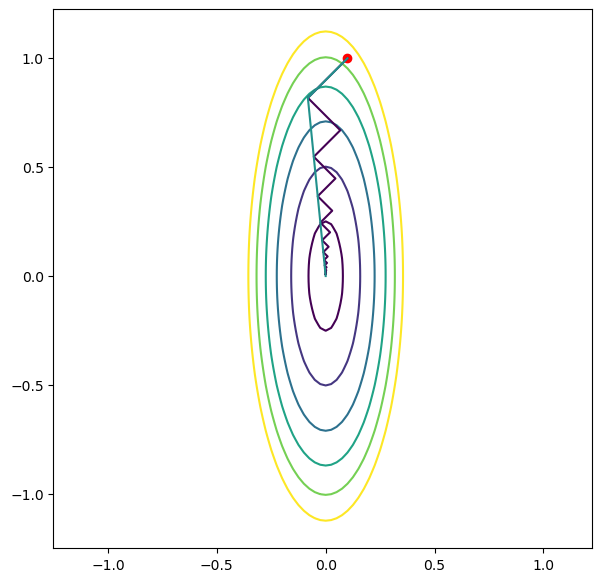

In [8]:
x20Iter = [x[0] for x in iterates2]
x21Iter = [x[1] for x in iterates2]

ax.plot(x20Iter,x21Iter, color=cm.viridis(0.5))
fig

In [9]:
iterates2

[array([0.1, 1. ]),
 array([-0.08181818,  0.81818182]),
 array([4.16333634e-17, 0.00000000e+00]),
 array([-8.83131951e-18, -5.04646829e-17]),
 array([-1.38666956e-32, -1.38777878e-16]),
 array([ 1.54074396e-33, -1.38777878e-16]),
 array([ 3.25008189e-48, -1.38777878e-16]),
 array([ 4.50968300e-49, -1.38777878e-16]),
 array([-3.03858168e-64, -1.38777878e-16]),
 array([ 1.79552554e-64, -1.38777878e-16]),
 array([ 1.34940134e-79, -1.38777878e-16])]